In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(5)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight vs Height')

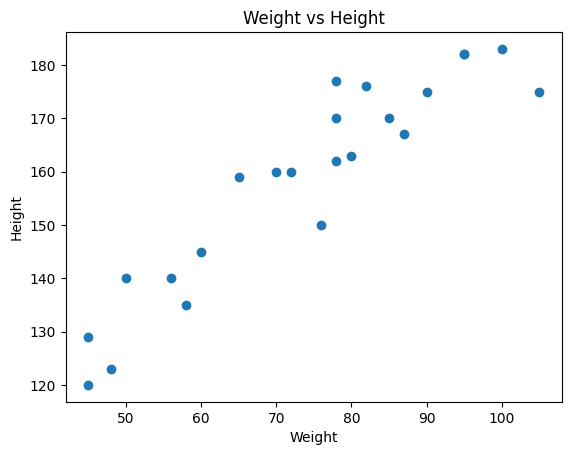

In [5]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')

In [6]:
df[['Weight', 'Height']].corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [7]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(df[['Weight']], df['Height'])

In [8]:
mi

array([0.80565107])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Weight']], df['Height'], test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
model.coef_, model.intercept_

(array([17.03207732]), 157.8125)

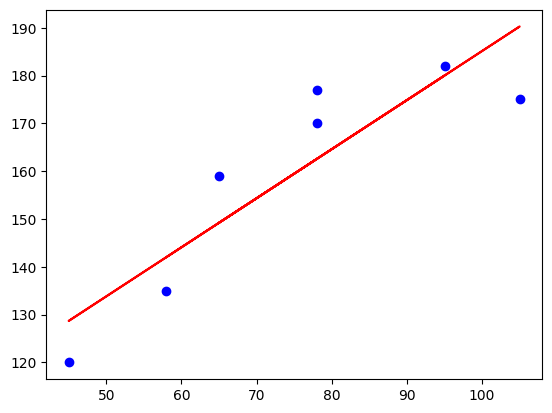

In [13]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, model.predict(X_test_scaled), color='red', label='Predicted')

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [28]:
X = df[['Weight','Height']]
X = add_constant(X)

In [29]:
X.columns

Index(['const', 'Weight', 'Height'], dtype='object')

In [30]:
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [31]:
print(vif_data)

  Features         VIF
0    const  162.286778
1   Weight    7.520214
2   Height    7.520214
